### Отримання метеорологічних даних від NOAA

Завантажуємо CSV файл з сайту https://www.ncdc.noaa.gov/cag/

Посилання на файл:
https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/city/time-series/USH00305801/tavg/1/1/1895-2022.csv?base_prd=true&begbaseyear=1991&endbaseyear=2020

В файлі знаходяться дані січневих температур Нью-Йорка починаючи з 1895 року

Прибираємо зайві стовпці і рядки, називаємо стовпці відповідними іменами, прибираємо номер місяця з дати

In [1]:
import pandas as pd

temperatures = pd.read_csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/city/time-series/USH00305801/tavg/1/1/1895-2022.csv?base_prd=true&begbaseyear=1991&endbaseyear=2020",
                           usecols=[0, 1, 2],
                            names=["Date", "Temperature", "Anomaly"],
                            skiprows=5,
                           )
temperatures.Date = temperatures.Date.floordiv(100)
temperatures.head()

,Date,Temperature,Anomaly
0,1895,28.9,-4.8
1,1896,28.5,-5.2
2,1897,29.3,-4.4
3,1898,33.9,0.2
4,1899,29.8,-3.9


In [5]:
from sklearn.model_selection import train_test_split

temperatures2018 = temperatures[temperatures.Date < 2019]

x_train, x_test, y_train, y_test = train_test_split(
    temperatures2018.Date.values.reshape(-1, 1), temperatures2018.Temperature.values, random_state=11)

print(x_train.shape, x_test.shape)

(93, 1) (31, 1)


In [7]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(x_train, y_train)

LinearRegression()

In [8]:
print(linear_regression.coef_)

print(linear_regression.intercept_)

[0.0268946]
-20.80512328295964


In [9]:
predicted = linear_regression.predict(x_test)

expected = y_test

for pd, ed in zip(predicted[::5], expected[::5]):
    print(f"predicted: {pd:.2f}, expected: {ed:.2f}")

predicted: 32.12, expected: 26.20
predicted: 33.28, expected: 30.10
predicted: 30.94, expected: 32.00
predicted: 31.29, expected: 39.60
predicted: 32.39, expected: 27.80
predicted: 31.83, expected: 28.10
predicted: 30.86, expected: 33.20


In [10]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

print(predict(2019))

print(predict(1890))

[33.49507857]
[30.02567489]


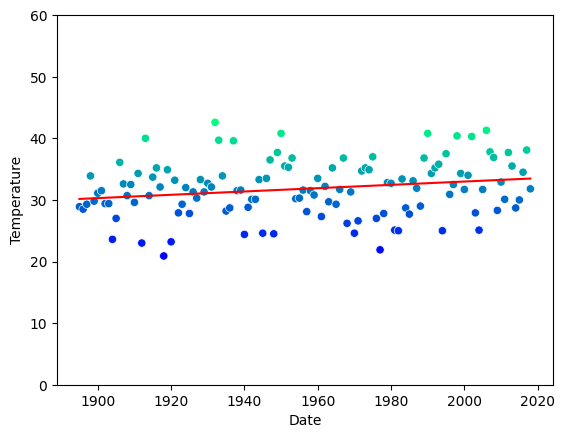

In [17]:
import seaborn as sns

axes = sns.scatterplot(data=temperatures2018, x="Date", y="Temperature", hue="Temperature", palette="winter", legend=False)

axes.set_ylim(0, 60)

import numpy as np

x = np.array([min(temperatures2018.Date.values), max (temperatures2018.Date.values)])
y = predict(x)

import matplotlib.pyplot as plt

line = plt.plot(x, y, c="red")